<a href="https://colab.research.google.com/github/shyoonCS/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

### 7-1 데이터 결측치 찾기

In [ ]:
import pandas as pd
import numpy as np


data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인
df.isnull()
df.isna()

## 열별, 행별 결측치 개수 확인
df.isnull().sum() #컬럼별(세로)
df.isnull().sum(axis=1) #행별(가로)

## 특정 열, 행 결측치 확인
df[df.isnull().any(axis=1)]
#df.isnull().any(axis=1)
#df[df['나이'].isnull()]
df['나이'].isnull()
## 결측치가 아닌 항목 확인
df.notnull()
## 결측치 비율
print(f'결측치 비율 : {df.isnull().sum().sum() /(df.shape[0] * df.shape[1]) * 100 } %')


### 7-2 데이터 시각화를 이용한 결측치 찾기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
#실행 후 런타임 다시 시작

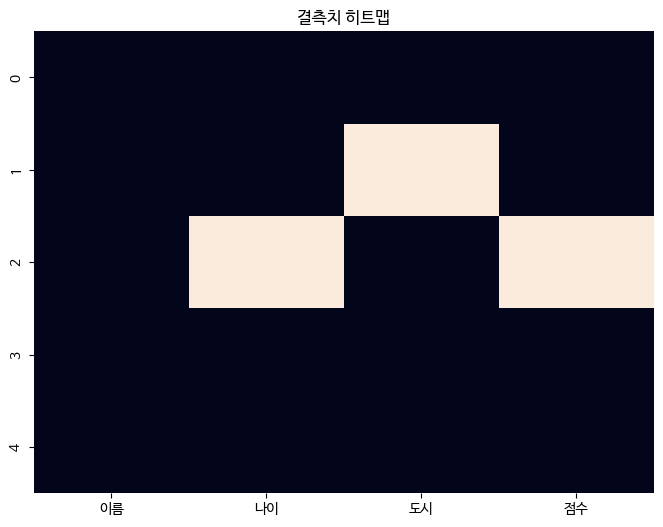

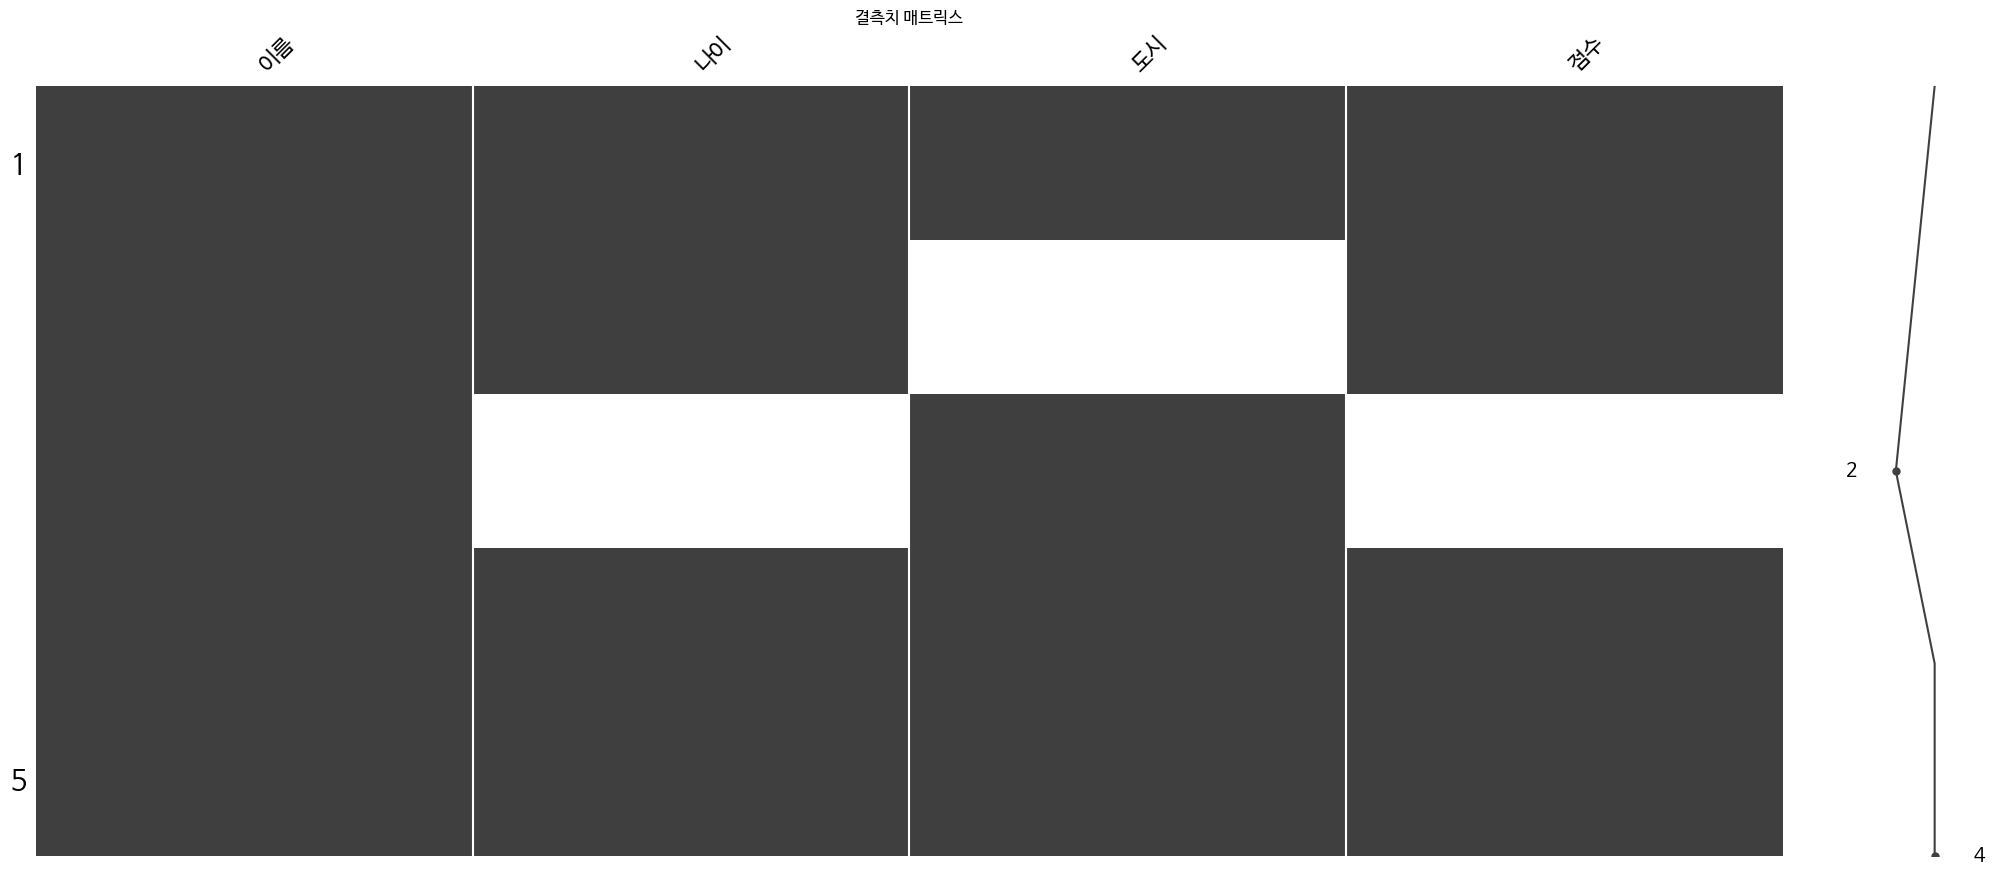

In [ ]:
import numpy as np
import pandas as pd

### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns #matplotlib 확장
import missingno as msno #결측치 시각화

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

### 7-3 사분위 범위를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1
하한값 = q1 - 1.5 * iqr
상한값 = q3 + 1.5 * iqr

### IQR 통계량 출력
print(q1)
print(q3)
print(하한값)
print(상한값)


### 7-4 Z-점수를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산
점수_평균 = df['점수'].mean()
점수_표준편차 = df['점수'].std()
df['점수_Z'] = (df['점수'] - 점수_평균) / 점수_표준편차
df

### 임계값 설정 및 이상치 여부 판단
임계값 = 2
df['이상치 여부'] = df['점수_Z'].abs() > 임계값
df
### 이상치 데이터 출력
df[df['이상치 여부']] #boolean index로 처리

### 이상치 비율 출력
df['이상치 여부'].mean() * 100 # 중요!! true = 1 이므로 평균 계산 가능

### 7-5 평균값 및 선형보간법을 통한 결측치 처리

In [ ]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
#print(df.isnull().sum())

df_cleaned = df.dropna(thresh=df.shape[1] - 1) # 행5개-1 = 4개 이상 채운것만 남김

### 나이, 소득 평균값 대치 및 결과 출력
df_cleaned.loc[:,['나이', '소득']] = df_cleaned[['나이','소득']].fillna(df_cleaned[['나이','소득']].mean())
#df_cleaned[['나이','소득']].mean()
#df_cleaned[0:5]
#df.loc[:,['나이','소득']]
#df_cleaned
#f[df.isnull().sum(axis=1) > 1]
#df_cleaned[['나이','소득']].mean()

### 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:,['지출','평균구매횟수']] = df_cleaned[['지출','평균구매횟수']].interpolate(method='linear')

df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

### 7-6 DataFrame 값 변경

In [ ]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

### replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('Seoul', '서울')
print(df)
### replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None:'미정', 'Incheon':'인천'})
print(df)

#---- map은 컬럼 단위 데이터, apply 행 단위 데이터 다루기 편함 ------------

### map을 이용한 컬럼 값 변경
print('map을 이용한 값 변경')
df = pd.DataFrame(data)
print(df)
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['city'] = df['city'].map(city_map)
print(df)

print('lambda 함수 이용한 변경') #replace와 유사, map은 함수활용 가능함
df['age_str'] = df['age'].map(lambda x : f" {x} 살" if pd.notna(x) else "알수없음")
print(df)
print(df['age'],df['age_str'])


### apply 함수를 이용한 컬럼값 변경 ## age_plus_one = age + 1
df['age_plus_one'] = df['age'].apply(lambda x : x+1 if pd.notna(x) else None)
print("apply 함수를 이용한 컬럼값 변경:\n", df[['age', 'age_plus_one']] )

### apply 함수를 이용한 행단위 값 변경
def age_plus_score(row) :
    age = row['age'] if pd.notna(row['age']) else 0
    score = row['score'] if pd.notna(row['score']) else 0
    return age + score
df['age_plus_score'] = df.apply(age_plus_score, axis=1)

### loc 인덱스를 이용한 값 변경() ## (score 90점보다 작으면 90으로 설정)
#loc : 조건에 맞는 행 반환
df.loc[df['score'] < 90, 'score'] = 90
print("loc 인덱스를 이용한 값 변경 : \n", df)
### where 함수를 이용한 값 변경 ## age 30이상이면 유지, 나머지는 0
df['age_where'] = df['age'].where(df['age'] >= 30, other = 0)
print("where 함수를 이용한 값 변경 : \n", df)

### 7-7 날짜 데이터 타입 다루기


In [ ]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환
df_date['date'] = pd.to_datetime(df_date['date_str'])
df_date.info()

### 날짜 데이터 분리
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['day'] = df_date['date'].dt.day
df_date['day_name'] = df_date['date'].dt.day_name()

### 날짜 데이터 포멧 변경
df_date['day_formatted'] = df_date['date'].dt.strftime('%Y/%m/%d')
df_date['day_formatted2'] = df_date['date'].dt.strftime('%y/%m/%d')

df_date

## 7-8 실습 시나리오 - 데이터 정제

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yshcskaggle","key":"1055d1ecca7b163081ec08c977fed0d0"}'}

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
#실행 후 런타임 다시 시작

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c store-sales-time-series-forecasting

!unzip store-sales-time-series-forecasting.zip

  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 1.07GB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [1]:
#6-5
import pandas as pd
### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns #matplotlib 확장
import missingno as msno #결측치 시각화

# Grocery Sales 데이터 DataFrame 로드
train = pd.read_csv('train.csv')
#train.to_excel('train.xlsx')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')

# 판매 데이터 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


### 데이터 분포 시각화

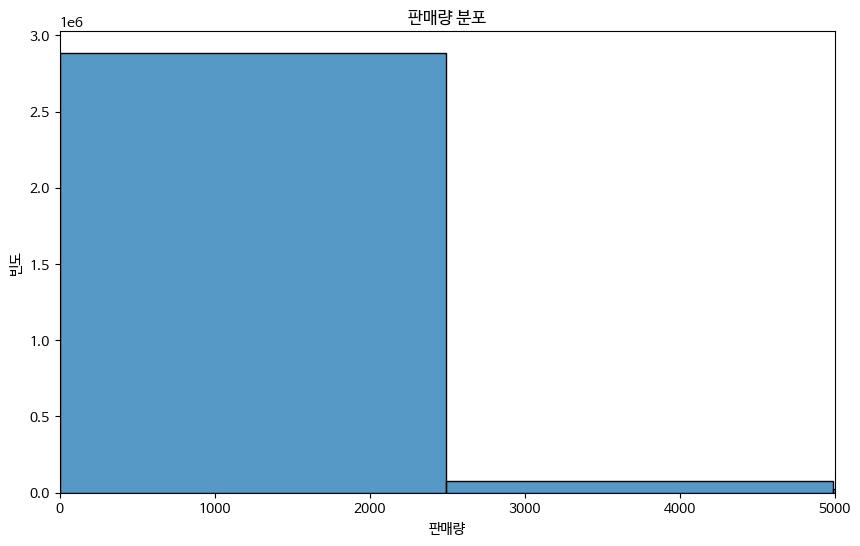

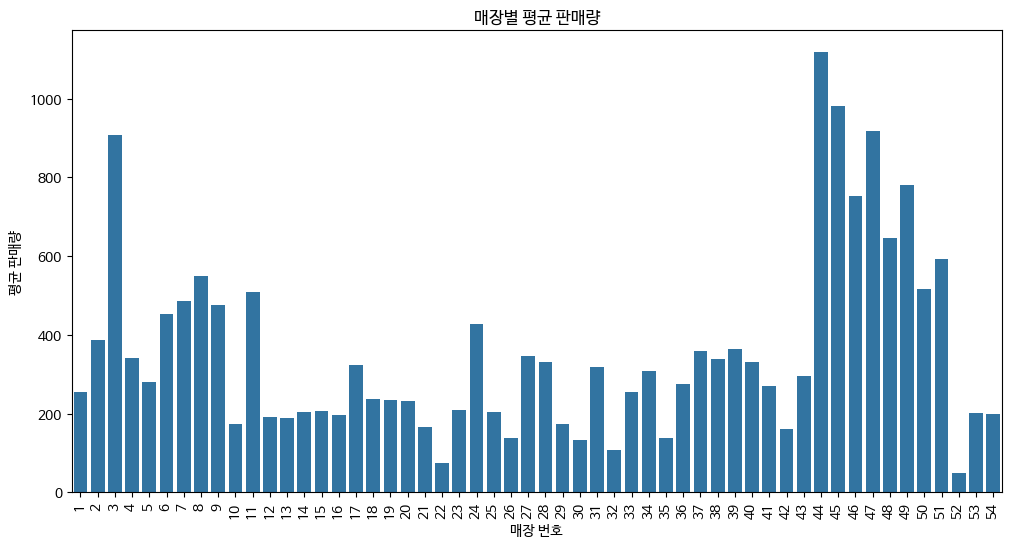

In [4]:
##6강 Kaggle 데이터셋 업로드 후 실습 할 것!!!
##참고 : 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정


plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

### 결측치 처리

In [5]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치
print(train.isnull().sum())
print(stores.isnull().sum())
print(oil.isnull().sum())
print(holidays_events.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


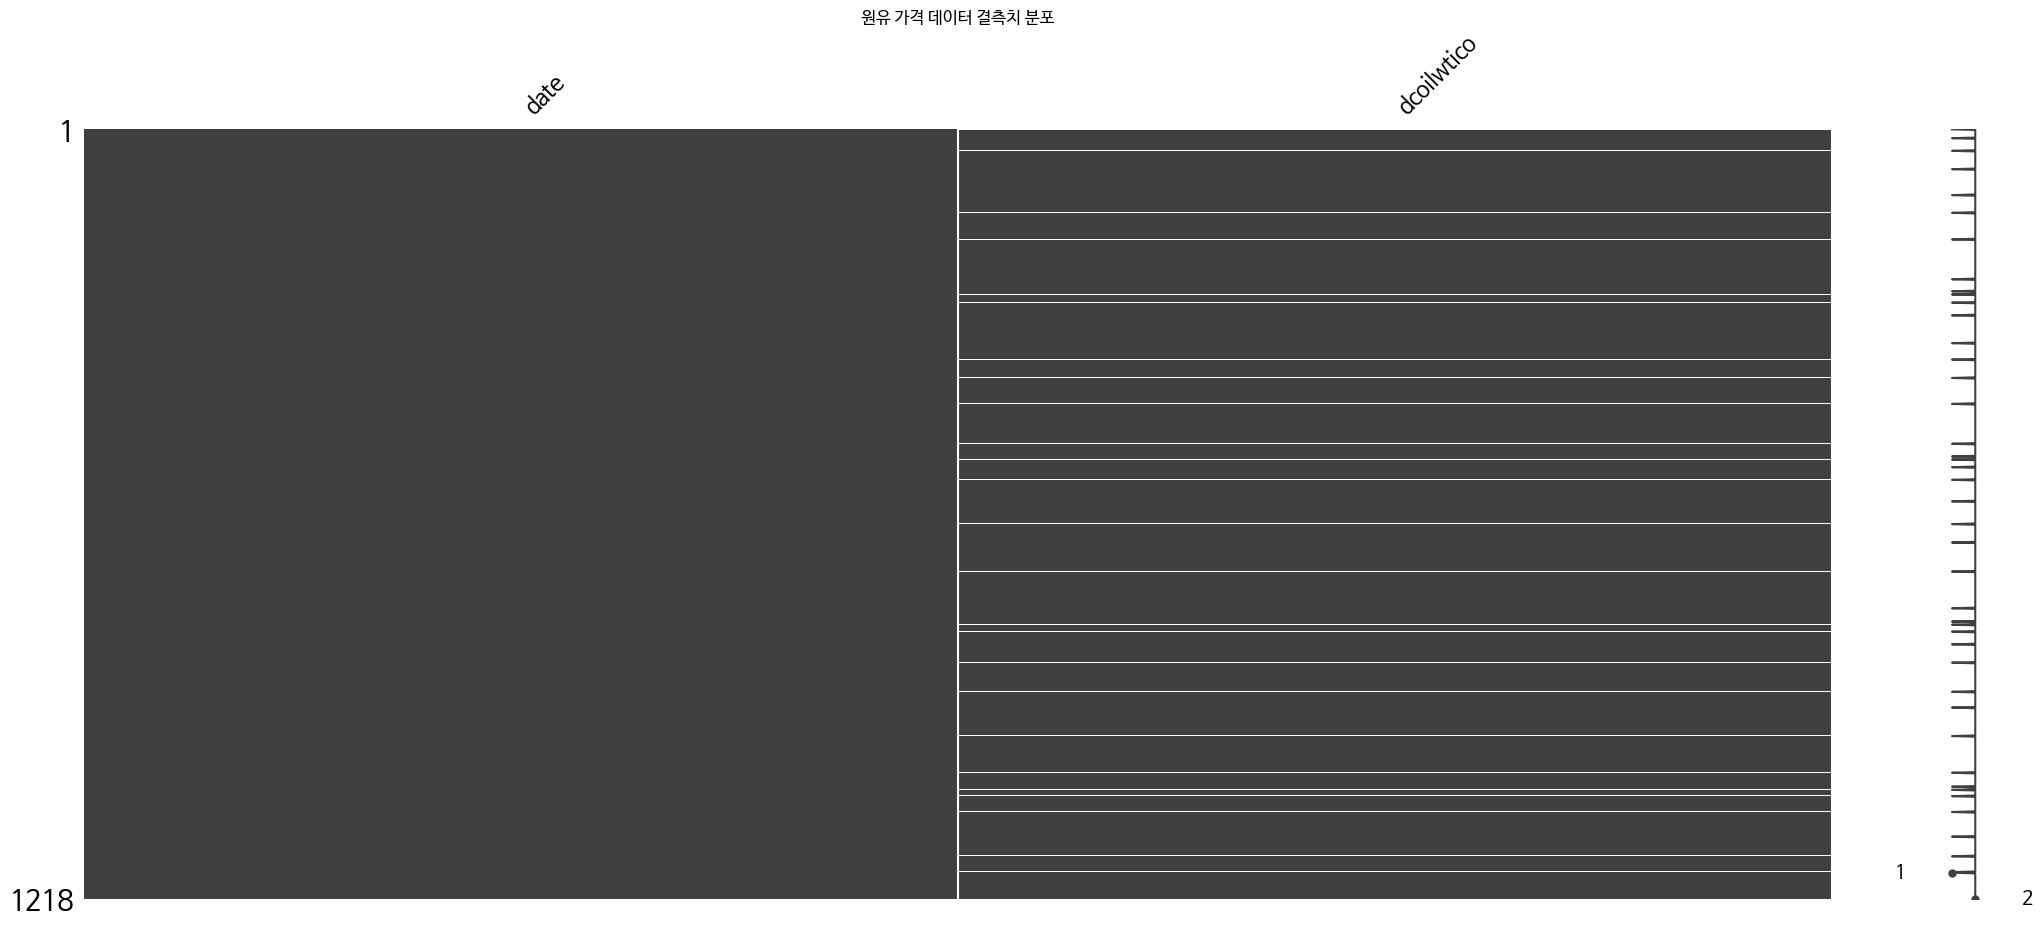

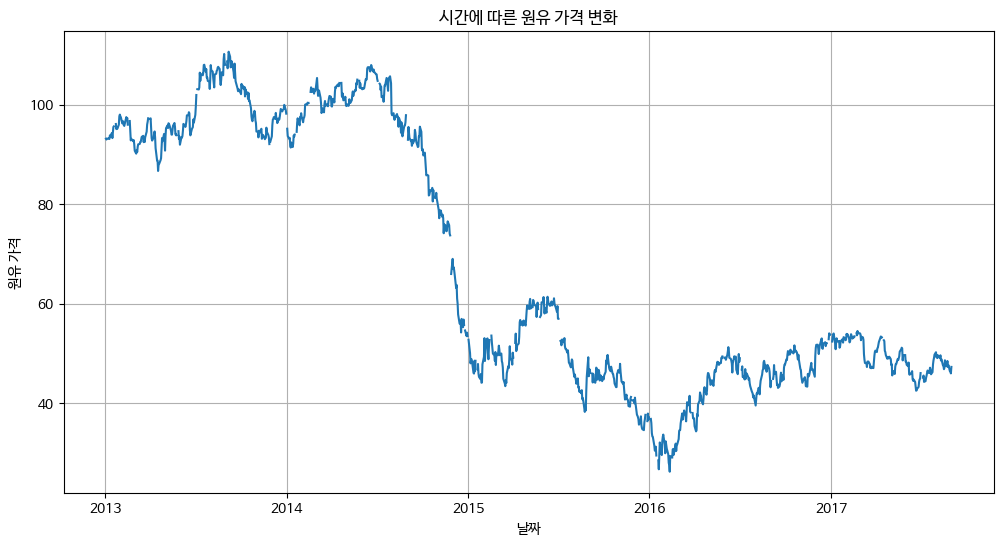

In [6]:


msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

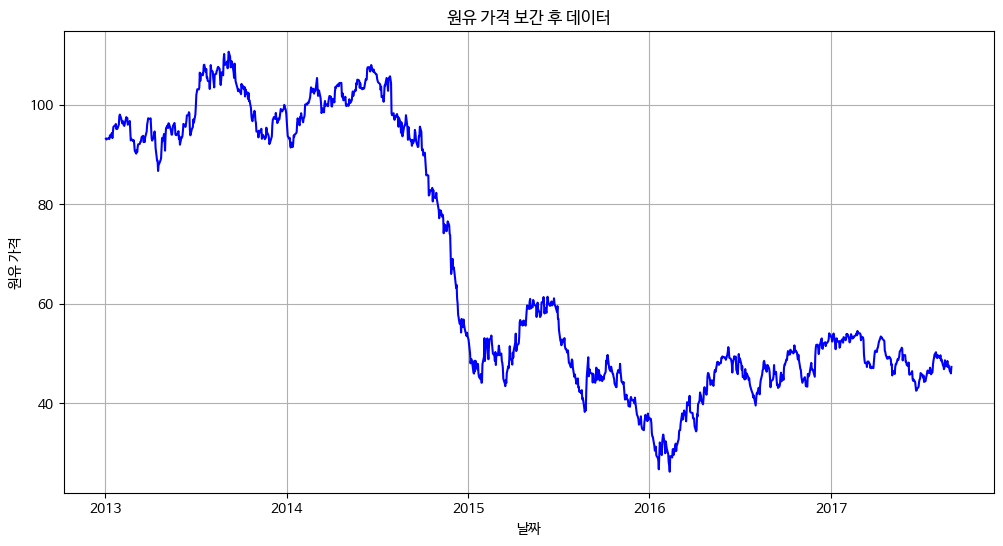

In [16]:
oil_cleaned = oil.copy()

### 선형 보간법 적용한 원유 가격 데이터 interpolate
oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate(method='linear')

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

In [ ]:
train.head()
#train.info()
train_sum = train.groupby('family')['sales'].sum()


이상치 개수: 200,274건
전체 대비 비율: 6.67%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


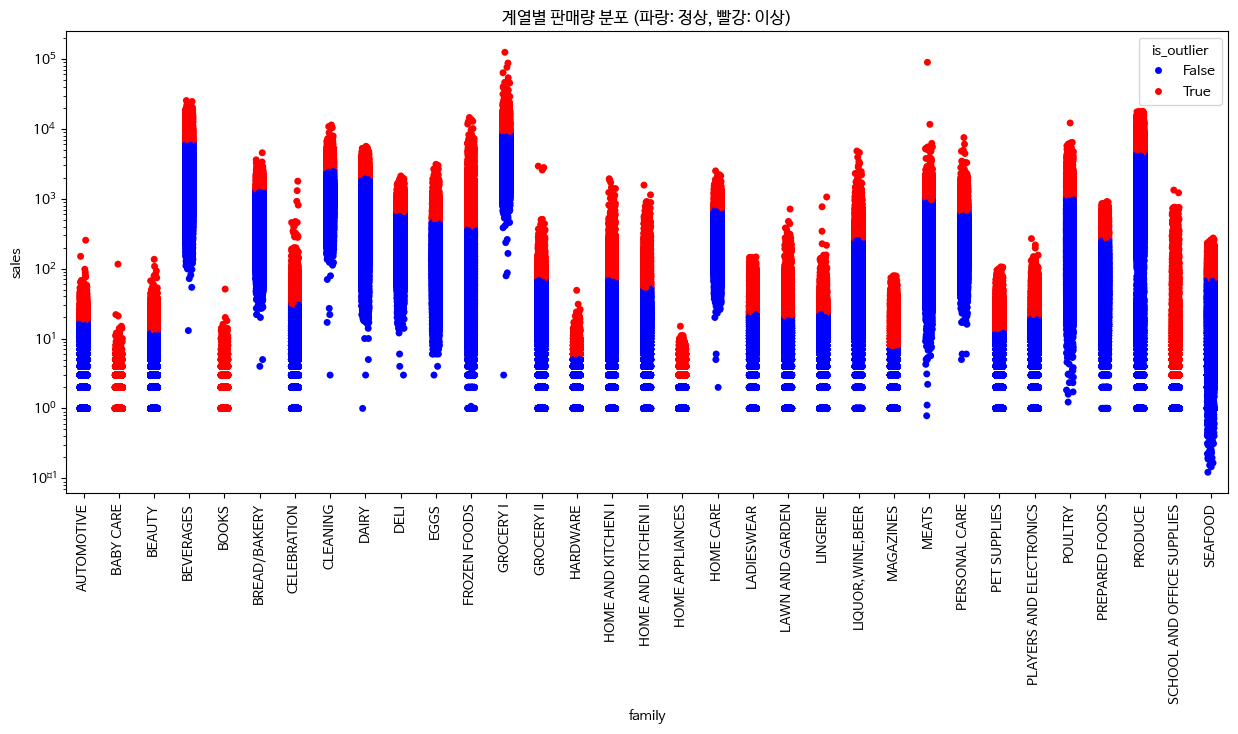

In [7]:
### 제품 계열별 판매 데이터 IQR 계산
family_bounds = train.groupby('family')['sales'].apply(
    #이상치 상한선 : 3Q + 1.5 * IQR
    lambda x : x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))
)

### 상한값 초과 판매량 이상치 분류
train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']

total_outliers = train_enhanced['is_outlier'].sum()
total_ratio = train_enhanced['is_outlier'].mean()

print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [43]:
#print([train.groupby('family')['sales'].sum()])
train.groupby('family')['sales'].apply(lambda x : [x.quantile(0.75), x.quantile(0.25)])

,sales
family,
AUTOMOTIVE,"[8.0, 2.0]"
BABY CARE,"[0.0, 0.0]"
BEAUTY,"[5.0, 0.0]"
BEVERAGES,"[3119.0, 897.0]"
BOOKS,"[0.0, 0.0]"
BREAD/BAKERY,"[645.0, 184.0]"
CELEBRATION,"[12.0, 0.0]"
CLEANING,"[1378.0, 630.0]"
DAIRY,"[926.0, 259.0]"


In [37]:
#upper_bounds = family_bounds['upper_bound']

### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()
#is_outlier 가 true 인 컬럼 중에서 sales 컬럼만 가져온다., is_outlier true인 값중 upper_bound로 채운다.
train_cleaned.loc[train_enhanced['is_outlier'],'sales'] = \
  train_enhanced.loc[train_enhanced['is_outlier'],'upper_bound']

changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

대체된 데이터 수: 200274건


In [39]:
train_enhanced[['family', 'sales']].sort_values(by='family')

,family,sales
0,AUTOMOTIVE,0.000
574398,AUTOMOTIVE,6.000
2588322,AUTOMOTIVE,6.000
852390,AUTOMOTIVE,0.000
1038642,AUTOMOTIVE,6.000
...,...,...
1941851,SEAFOOD,1.000
1941884,SEAFOOD,86.378
1941917,SEAFOOD,69.004
1941653,SEAFOOD,19.093


### 날짜 데이터 처리

In [49]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
oil_cleaned['date'] = pd.to_datetime(oil_cleaned['date'])

train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek

### 주말, 월초, 월말 여부 추출
train_cleaned['weekend'] = train_cleaned['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
train_cleaned['is_month_start'] = train_cleaned['date'].dt.is_month_start
train_cleaned['is_month_end'] = train_cleaned['date'].dt.is_month_end

print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())
print(train_cleaned[train_cleaned['weekend'] == 1][['date','weekend']].head()
print(train_cleaned[(train_cleaned['is_month_start']==True) | (train_cleaned['is_month_end']==True)][['date','is_month_start','is_month_end']])
print(train_cleaned[ (train_cleaned['is_month_end']==True)][['date','is_month_start','is_month_end']])


날짜 특성 추출 결과:
        date  year  month  day  dayofweek  weekend  is_month_start  \
0 2013-01-01  2013      1    1          1        0            True   
1 2013-01-01  2013      1    1          1        0            True   
2 2013-01-01  2013      1    1          1        0            True   
3 2013-01-01  2013      1    1          1        0            True   
4 2013-01-01  2013      1    1          1        0            True   

   is_month_end  
0         False  
1         False  
2         False  
3         False  
4         False  
           date  weekend
7128 2013-01-05        1
7129 2013-01-05        1
7130 2013-01-05        1
7131 2013-01-05        1
7132 2013-01-05        1
              date  is_month_start  is_month_end
0       2013-01-01            True         False
1       2013-01-01            True         False
2       2013-01-01            True         False
3       2013-01-01            True         False
4       2013-01-01            True         False
...           

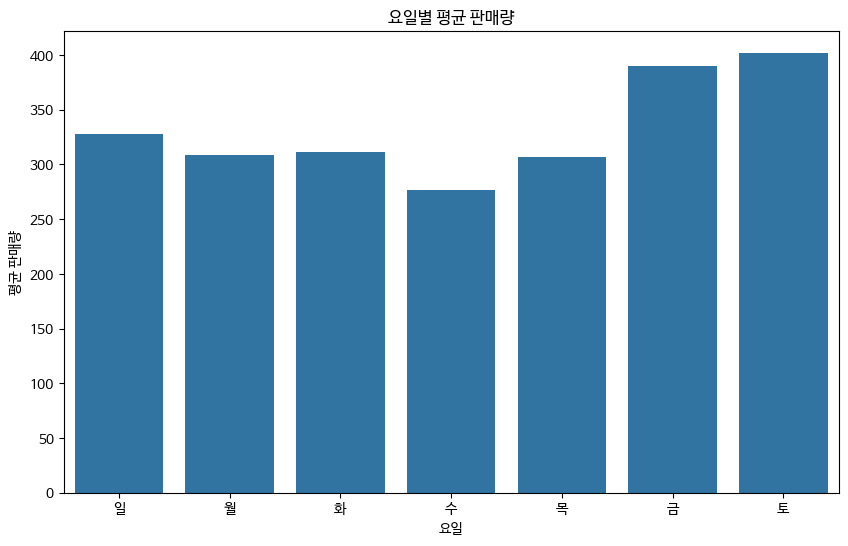

In [50]:
## 요일별 평균 판매량을 계산
day_sales = train_cleaned.groupby('dayofweek')['sales'].mean().reset_index()

## 요일 출력값 변경
day_sales['day_name'] = day_sales['dayofweek'].map({
    0:'일', 1:'월', 2:'화', 3:'수', 4:'목', 5:'금', 6:'토'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

In [73]:
print('apply', type(train_cleaned.apply))
print('groupby',type(train_cleaned.groupby))
print('dt', type(train_cleaned['date'].dt))
print('dt', type(train_cleaned['date'].dt.is_month_end))
print('columns',type(train_cleaned.columns))

apply <class 'method'>
groupby <class 'method'>
dt <class 'pandas.core.indexes.accessors.DatetimeProperties'>
dt <class 'pandas.core.series.Series'>
columns <class 'pandas.core.indexes.base.Index'>


### 데이터 통합

In [77]:
## 판매, 거래 데이터 통합 JOIN 유사
train_with_trans = pd.merge(
    train_cleaned, transactions,
    on=['date', 'store_nbr'],
    how='left'
    )

## 매장 데이터 통합
train_with_store = pd.merge(
    train_with_trans, stores,
    on=['store_nbr'],
    how='left'

)

## 원유 데이터 통합
train_final = pd.merge(
    train_with_store, oil_cleaned,
    on=['date'],
    how='left'
)


print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())

최종 데이터셋 정보:
행 개수: 3000888, 열 개수: 19
['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end', 'transactions', 'city', 'state', 'type', 'cluster', 'dcoilwtico']
   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   dayofweek  weekend  is_month_start  is_month_end  transactions   city  \
0          1        0            True         False           NaN  Quito   
1          1        0            True         False           NaN  Quito   
2          1        0            True  

In [78]:
oil_cleaned.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
